<a href="https://colab.research.google.com/github/hasanj0n/Data_Science/blob/main/titanic_disaster_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing all necessary library and packgaes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

### Getting datasets from github

In [3]:
!git clone "https://github.com/hasanj0n/Datasets.git"

Cloning into 'Datasets'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), 1.26 MiB | 2.86 MiB/s, done.


In [4]:
train_set = pd.read_csv("/content/Datasets/Titanic_datasets/train.csv", index_col=0)
x_test = pd.read_csv("/content/Datasets/Titanic_datasets/test.csv", index_col=0)
y_test = pd.read_csv("/content/Datasets/Titanic_datasets/gender_submission.csv", index_col=0)

### About datesets

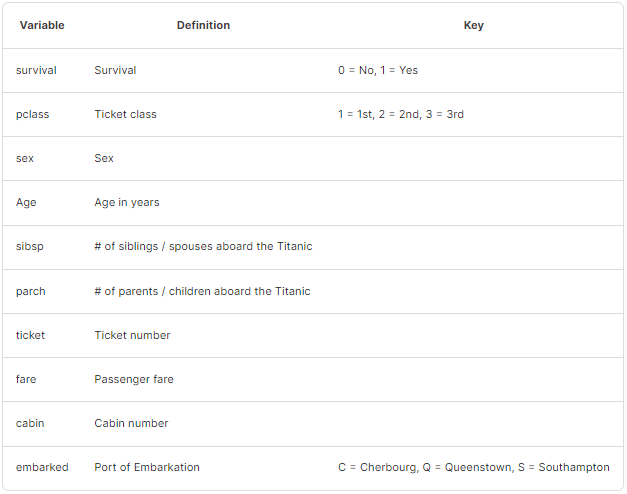

Variable Notes

**pclass:** A proxy for socio-economic status (SES)

* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


In [5]:
train_set

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
# Columns which will be for creating a model.
train_set = train_set[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
train_set.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.25,S


In [7]:
y_test

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [8]:
x_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [9]:
# Columns which will be for creating a model.
x_test = x_test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
x_test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q


### **General and Statistical** information about the datasets and **Data Cleaning** and **Data Preparation**

In [10]:
# General information
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [11]:
train_set.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

The Age column in the dataset has 177 nan values. We drop all.

In [12]:
train_set.dropna(inplace=True)

<ipython-input-12-222b7e896395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.dropna(inplace=True)


In [13]:
# Repeated row
train_set.duplicated().sum()

38

In [14]:
# Dropping duplicated rows
train_set.drop_duplicates(inplace=True)

<ipython-input-14-9f0a54c51e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop_duplicates(inplace=True)


In [15]:
# Convert text columns to numeric columns
train_set=pd.get_dummies(train_set)
train_set

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,28.0,0,0,10.5000,0,1,0,0,1
886,0,3,39.0,0,5,29.1250,1,0,0,1,0
888,1,1,19.0,0,0,30.0000,1,0,0,0,1


In [16]:
# Correlation of the "Survived" column with other columns
train_set.corrwith(train_set.Survived).abs().sort_values(ascending=False)

Survived      1.000000
Sex_female    0.519043
Sex_male      0.519043
Pclass        0.353706
Fare          0.257691
Embarked_C    0.181328
Embarked_S    0.142421
Age           0.090309
Parch         0.082956
Embarked_Q    0.055400
SibSp         0.034734
dtype: float64

In [17]:
# Function for clearing dataset
def clean(df):
  """Function for clearing dataset"""
  df.dropna(inplace=True)
  df.drop_duplicates(inplace=True)
  df= pd.get_dummies(df)
  return df


In [31]:
# Clearing the "y_test" column
x_test=clean(x_test)

In [34]:
y_test = y_test.loc[x_test.index]

### Data analysis, with the help of visualization

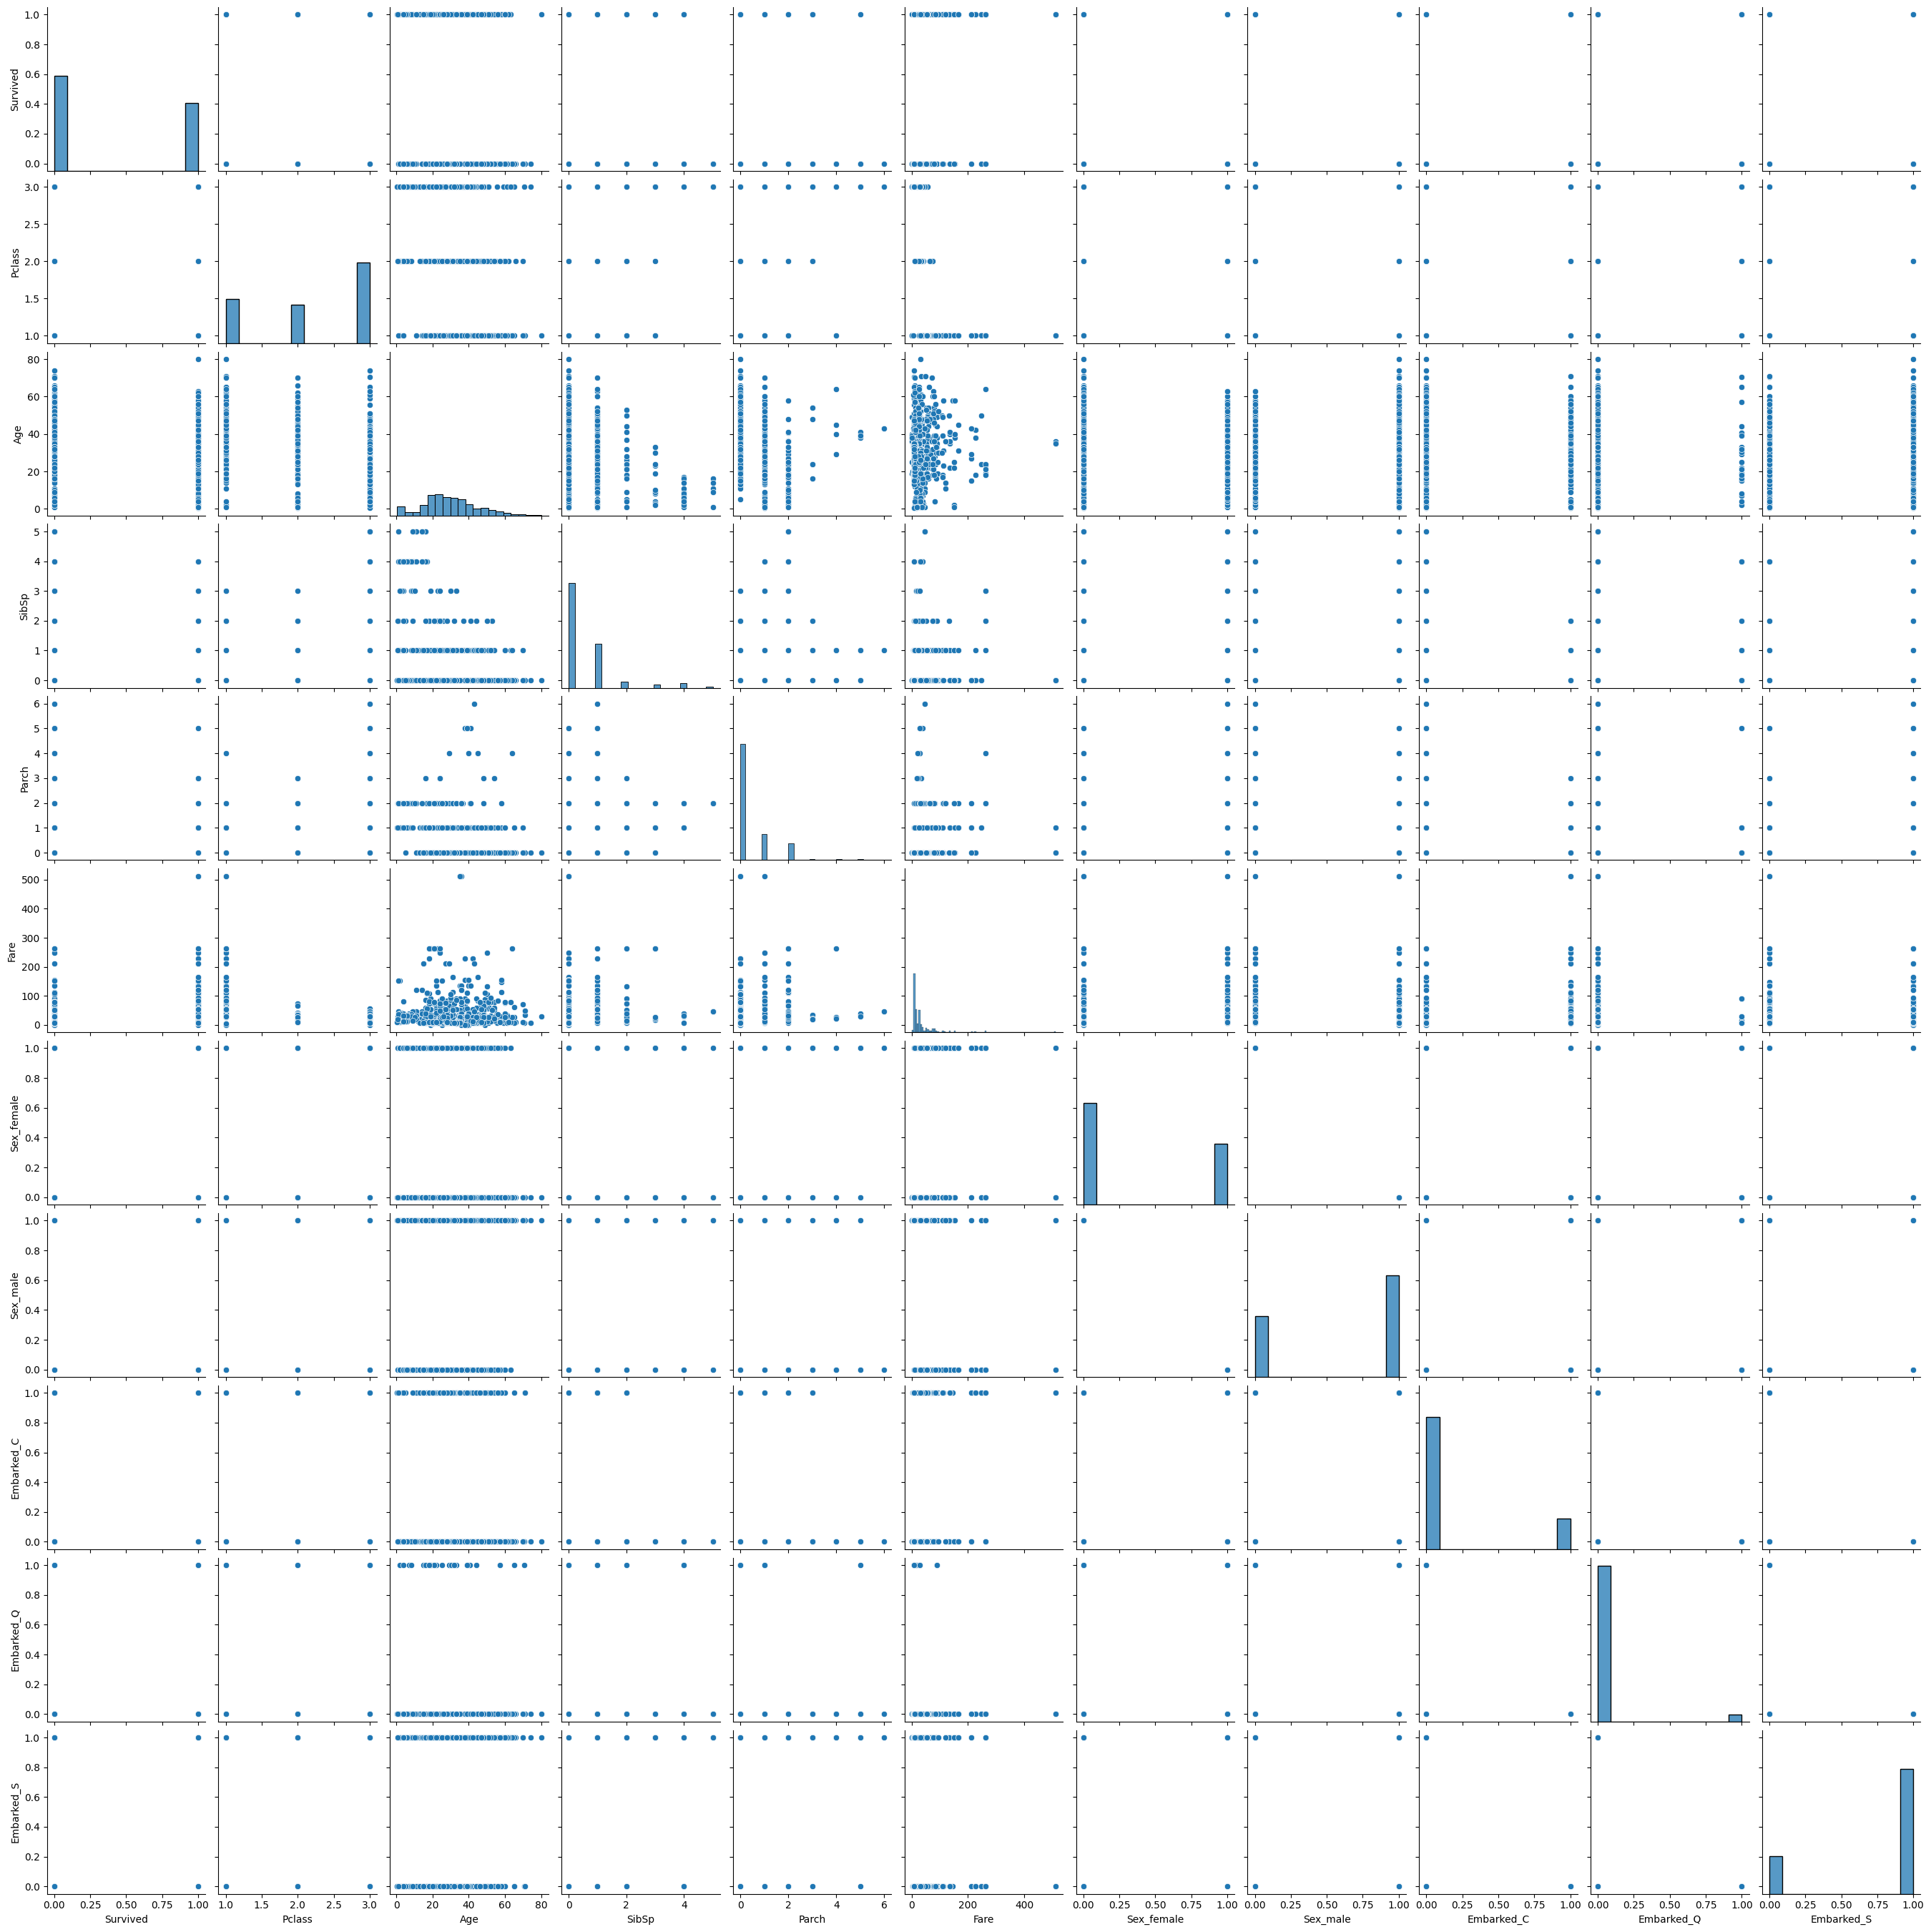

In [19]:
sns.pairplot(train_set)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

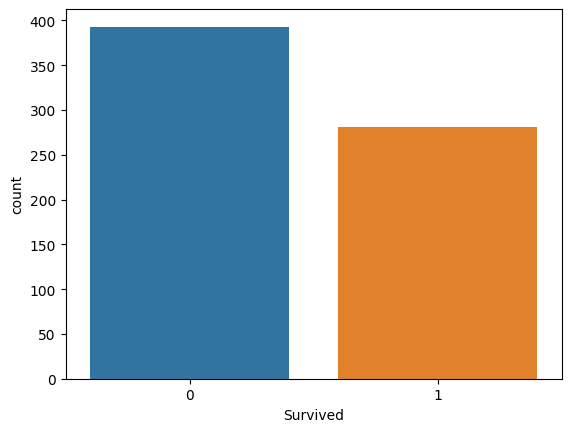

In [20]:
sns.countplot(train_set, x="Survived")

### Praparing dataset for ML

In [21]:
x_train = train_set.drop("Survived", axis=1)
y_train = train_set[["Survived"]]

In [22]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,2,28.0,0,0,10.5000,0,1,0,0,1
886,3,39.0,0,5,29.1250,1,0,0,1,0
888,1,19.0,0,0,30.0000,1,0,0,0,1


### Machine Learning

#### Logistic regression


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.94      0.91      0.92       197
           1       0.86      0.90      0.88       124

    accuracy                           0.91       321
   macro avg       0.90      0.91      0.90       321
weighted avg       0.91      0.91      0.91       321

Model Accuracy: 0.9065420560747663


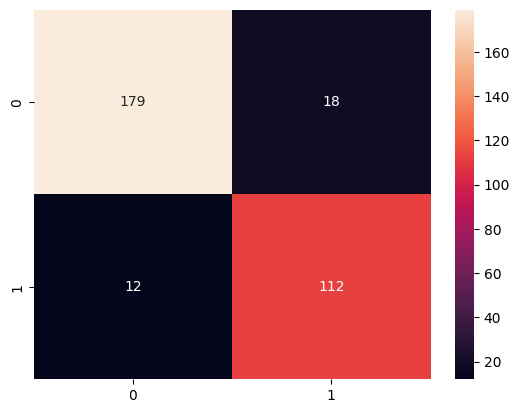

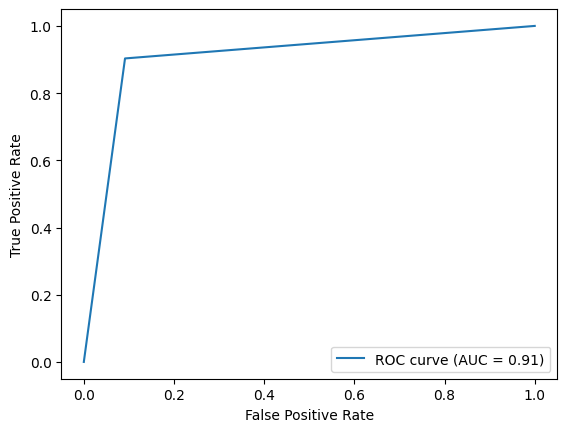

In [52]:
# Model training
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

# Model evaluation
y_pred = LR_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#### Support Vector Machine

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.67      0.84      0.74       197
           1       0.57      0.34      0.42       124

    accuracy                           0.64       321
   macro avg       0.62      0.59      0.58       321
weighted avg       0.63      0.64      0.62       321

Model Accuracy: 0.6448598130841121


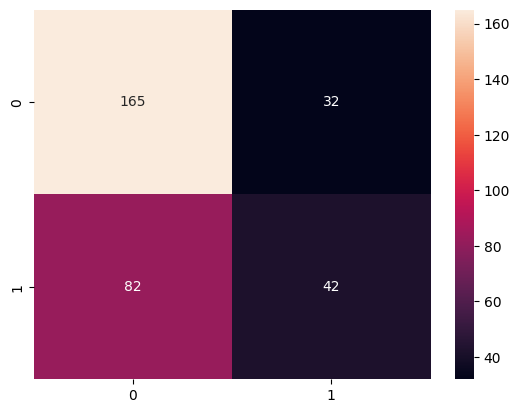

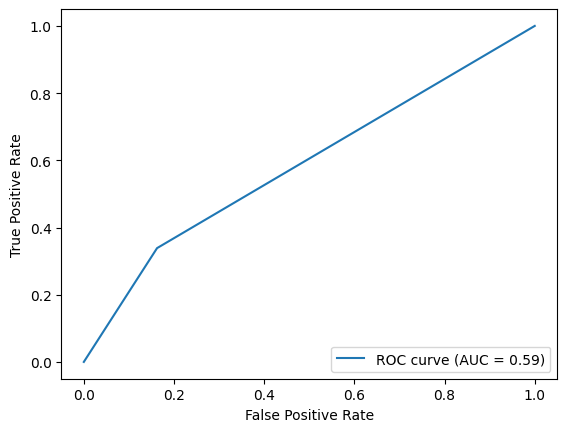

In [46]:
# Model training
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Model evaluation
y_pred = svm_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#### Decision Tree

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       197
           1       0.65      0.73      0.69       124

    accuracy                           0.74       321
   macro avg       0.73      0.74      0.74       321
weighted avg       0.75      0.74      0.75       321

Model Accuracy: 0.7445482866043613


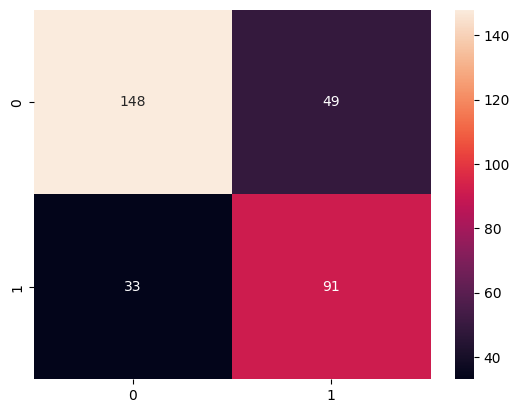

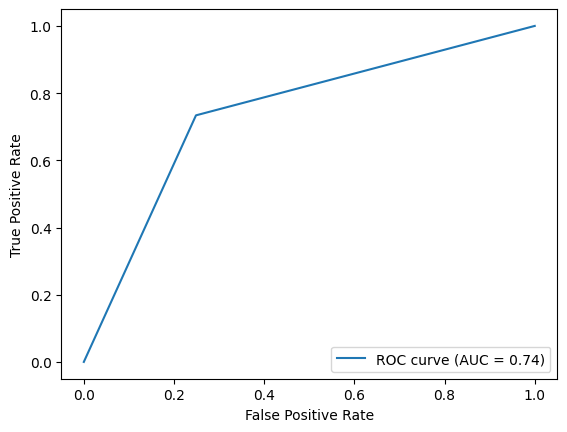

In [47]:
# Model training
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

# Model evaluation
y_pred = tree_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

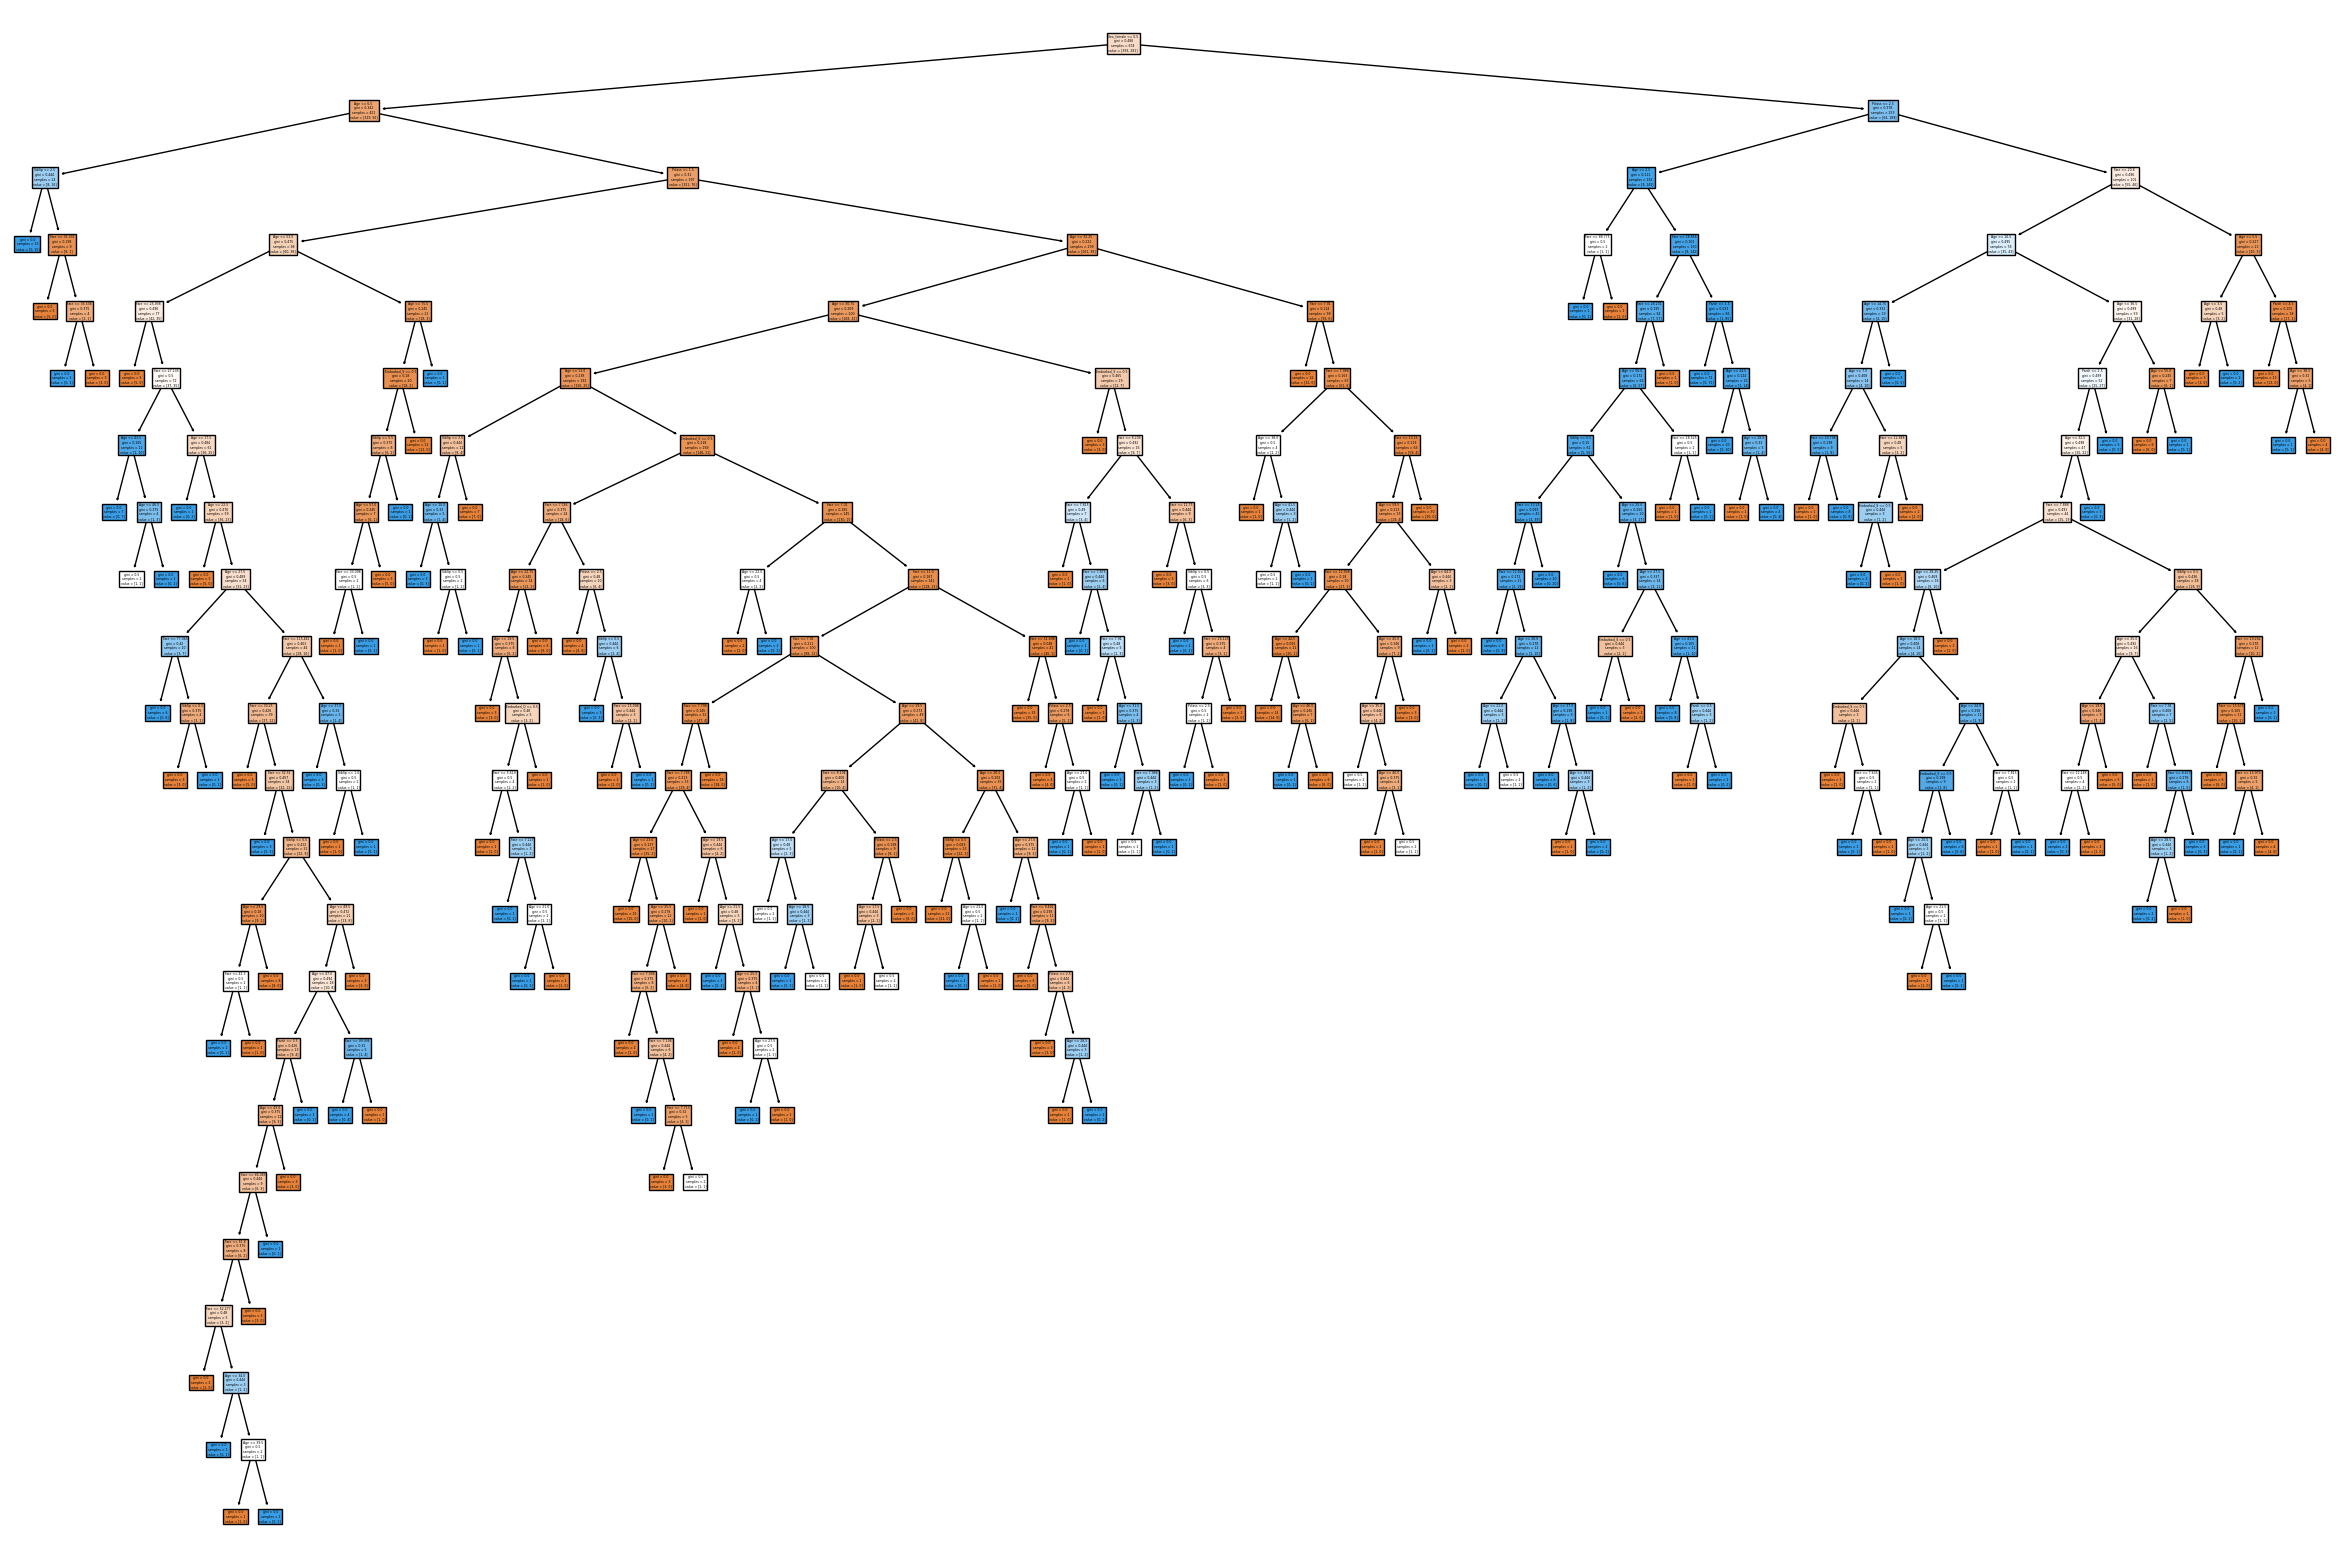

In [48]:
cols = x_train.columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

#### Random Forest

<ipython-input-49-7b30c2c6035d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(x_train, y_train)


              precision    recall  f1-score   support

           0       0.87      0.82      0.84       197
           1       0.74      0.80      0.77       124

    accuracy                           0.81       321
   macro avg       0.80      0.81      0.81       321
weighted avg       0.82      0.81      0.81       321

Model Accuracy: 0.8130841121495327


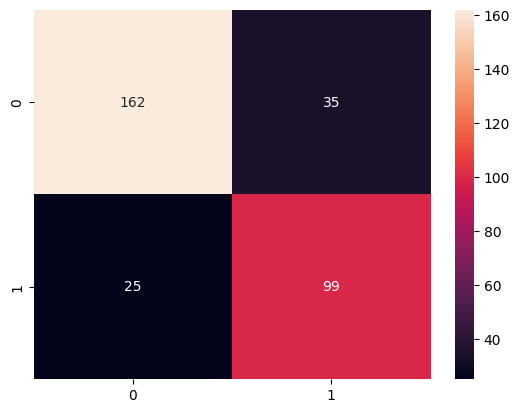

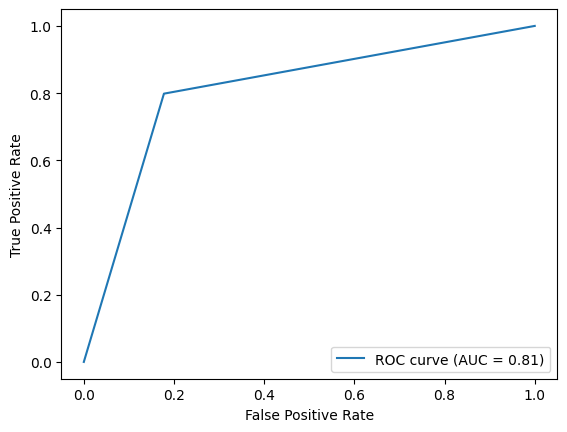

In [49]:
# Model training
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(x_train, y_train)

# Model evaluation
y_pred = RF_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#### XGB model

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       197
           1       0.74      0.80      0.77       124

    accuracy                           0.82       321
   macro avg       0.81      0.81      0.81       321
weighted avg       0.82      0.82      0.82       321

Model Accuracy: 0.8161993769470405


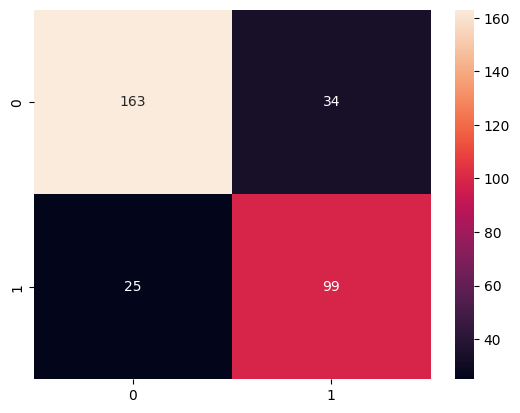

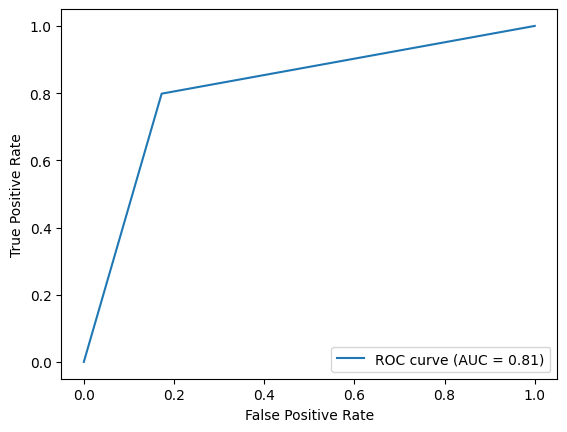

In [50]:
# Model training
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Model evaluation
y_pred = xgb_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model Accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### The best algorithm for this problem is **Logistic Regession**

In [53]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,